In [3]:
from hana_ml import dataframe as hdf
import pandas as pd

In [4]:
myconn=hdf.ConnectionContext(userkey='DevChallenger')
print("SAP HANA DB version: ", myconn.hana_version())

SAP HANA DB version:  4.00.000.00.1678185420 (fa/CE2022.42)


In [5]:
print(myconn.sql("SELECT NOW() FROM DUMMY").collect().CURRENT_TIMESTAMP[0])

2023-03-29 09:51:29.160000


In [6]:
myconn.get_tables()

,TABLE_NAME
0,CML_WASTE_WATER_VERTICES
1,BIKES
2,CML_WASTE_WATER_EDGES
3,MONTHS
4,SEASONS


In [21]:
bikes_hdf=myconn.table('BIKES').select(('"days_since_2011"', "Days_Counter"),
                                        ('add_days(\'2011-01-01\',"days_since_2011")', "CalDay"),
                                        ('"yr"', "Year"),
                                        ('"season"', "Season"),
                                        ('"mnth"', "Month"),
                                        ('"weekday"', "Weekday"),
                                        ('"workingday"', "Is_WorkingDay"),
                                        ('"holiday"', "Is_Holiday"),
                                        ('"weathersit"', "Weather"),
                                        ('"temp"', "Temperature"),
                                        ('"hum"', "Humidity"),
                                        ('"windspeed"', "Wind_Speed"),
                                        ('"cnt"', "Bikes_Rented")
                                       )

In [22]:
bikes_hdf.columns

['Days_Counter',
 'CalDay',
 'Year',
 'Season',
 'Month',
 'Weekday',
 'Is_WorkingDay',
 'Is_Holiday',
 'Weather',
 'Temperature',
 'Humidity',
 'Wind_Speed',
 'Bikes_Rented']

In [12]:

bikes_hdf.select?

Signature: bikes_hdf.select(*cols)
Docstring:
Returns a new DataFrame with columns derived from the current DataFrame.

.. warning::
    There is no check that inputs interpreted as SQL expressions are
    actually valid expressions; an "expression" like
    "A FROM TAB; DROP TABLE IMPORTANT_THINGS; SELECT A" can cause
    a lot of damage.

Parameters
----------
cols : str or (str, str) tuple.
    The columns in the new DataFrame. A string is treated as the name
    of a column to select; a (str, str) tuple is treated as
    (SQL expression, alias). As a special case, '*' is expanded
    to all columns of the original DataFrame.

Returns
-------
DataFrame
    A new DataFrame object with the specified columns.

Raises
------
hana_ml.ml_exceptions.BadSQLError
    If comments or malformed tokens are detected in a column
    expression. May have false positives and false negatives.

Examples
--------
Input:

>>> df.collect()
   A  B  C
0  1  2  3

Selecting a subset of existing columns:

>

In [13]:
bikes_hdf.select_statement

'SELECT "days_since_2011" AS "Days_Counter", add_days(\'2011-01-01\',"days_since_2011") AS "CalDay", "yr" AS "Year", "season" AS "Season", "mnth" AS "Month", "weekday" AS "Weekday", "workingday" AS "Is_WorkingDay", "holiday" AS "Is_Holiday", "weathersit" AS "Weather", "temp" AS "Temperature", hum AS "Humidity", "windspeed" AS "Wind_Speed", "cnt" AS "Bikes_Rented" FROM (SELECT * FROM "BIKES") AS "DT_4"'

In [25]:
bikes_hdf.head(5).collect().set_index('Days_Counter')

,CalDay,Year,Season,Month,Weekday,Is_WorkingDay,Is_Holiday,Weather,Temperature,Humidity,Wind_Speed,Bikes_Rented
Days_Counter,,,,,,,,,,,,
0,2011-01-01,2011,WINTER,JAN,SAT,NO WORKING DAY,NO HOLIDAY,MISTY,8.175849,80.5833,10.749882,985
1,2011-01-02,2011,WINTER,JAN,SUN,NO WORKING DAY,NO HOLIDAY,MISTY,9.083466,69.6087,16.652113,801
2,2011-01-03,2011,WINTER,JAN,MON,WORKING DAY,NO HOLIDAY,GOOD,1.229108,43.7273,16.636703,1349
3,2011-01-04,2011,WINTER,JAN,TUE,WORKING DAY,NO HOLIDAY,GOOD,1.400000,59.0435,10.739832,1562
4,2011-01-05,2011,WINTER,JAN,WED,WORKING DAY,NO HOLIDAY,GOOD,2.666979,43.6957,12.522300,1600


In [26]:
bikes_hdf.count()

731

In [27]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity.default_value

'last_expr'

In [28]:
from matplotlib import pyplot as plt

In [29]:
%matplotlib inline

In [31]:
plt.show?

Signature: plt.show(close=None, block=None)
Docstring:
Display all open figures.

Parameters
----------
block : bool, optional
    Whether to wait for all figures to be closed before returning.

    If `True` block and run the GUI main loop until all figure windows
    are closed.

    If `False` ensure that all figure windows are displayed and return
    immediately.  In this case, you are responsible for ensuring
    that the event loop is running to have responsive figures.

    Defaults to True in non-interactive mode and to False in interactive
    mode (see `.pyplot.isinteractive`).

See Also
--------
ion : Enable interactive mode, which shows / updates the figure after
      every plotting command, so that calling ``show()`` is not necessary.
ioff : Disable interactive mode.
savefig : Save the figure to an image file instead of showing it on screen.

Notes
-----
**Saving figures to file and showing a window at the same time**

If you want an image file as well as a user interfac

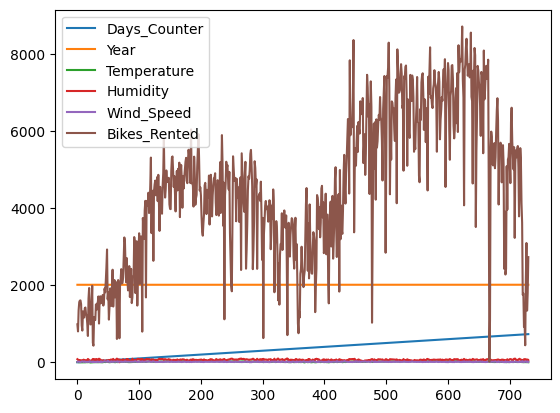

In [32]:
bikes_hdf.collect().plot()
plt.show()

In [33]:
prop_cycle_default = plt.rcParams['axes.prop_cycle']

In [34]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colors_df = pd.Series(data=[1]*len(colors), index=colors)
display(colors_df)

#1f77b4    1
#ff7f0e    1
#2ca02c    1
#d62728    1
#9467bd    1
#8c564b    1
#e377c2    1
#7f7f7f    1
#bcbd22    1
#17becf    1
dtype: int64

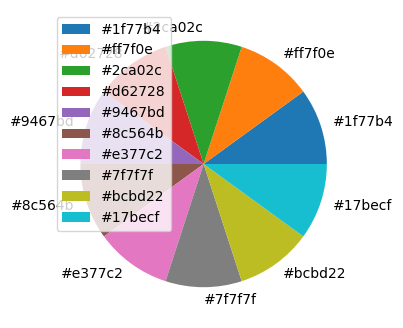

In [35]:
colors_df.plot(kind='pie', legend=True, figsize=(4,4))
plt.show()

In [38]:
from cycler import cycler 
sap_fiori_belize_cycler = cycler(color=['#0092D1', '#E09D00', '#1A9898', '#E6600D', '#925ACE', '#759421', '#678BC7', '#C14646', '#647987', '#AB218E'])

plt.rc('axes', prop_cycle=sap_fiori_belize_cycler)

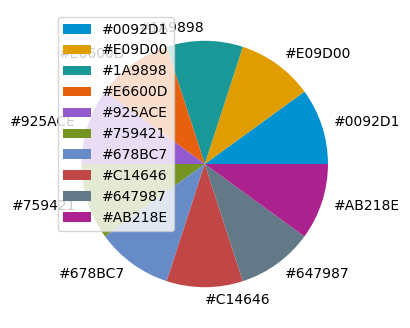

In [40]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colors_df = pd.Series(data=[1]*len(colors), index=colors)

colors_df.plot(kind='pie', legend=True, figsize=(4,4))
plt.show()

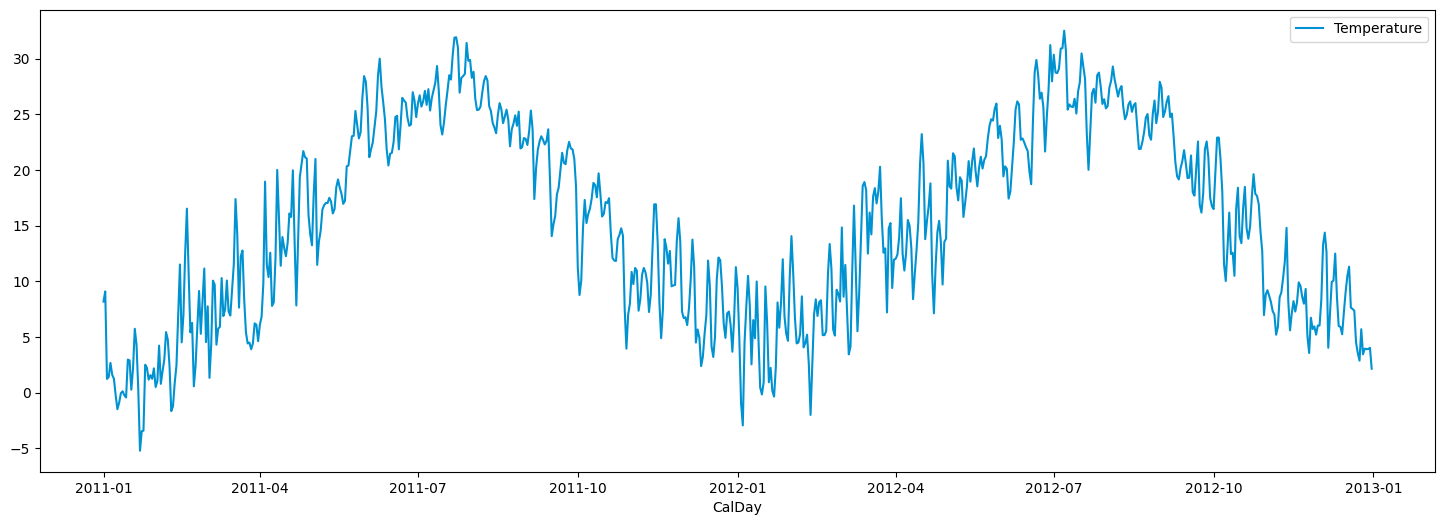

In [42]:
(bikes_hdf
 .select('CalDay', 'Bikes_Rented', 'Temperature').collect()
 .plot(x='CalDay', y=['Temperature'], figsize=(18, 6))
)
plt.show()

In [43]:
figsize_default=plt.rcParams["figure.figsize"]
print("Previous default figure size was : ", figsize_default)
plt.rcParams["figure.figsize"] = (18, 6)
print("Current default figure size is   : ", plt.rcParams["figure.figsize"])

Previous default figure size was :  [6.4, 4.8]
Current default figure size is   :  [18.0, 6.0]


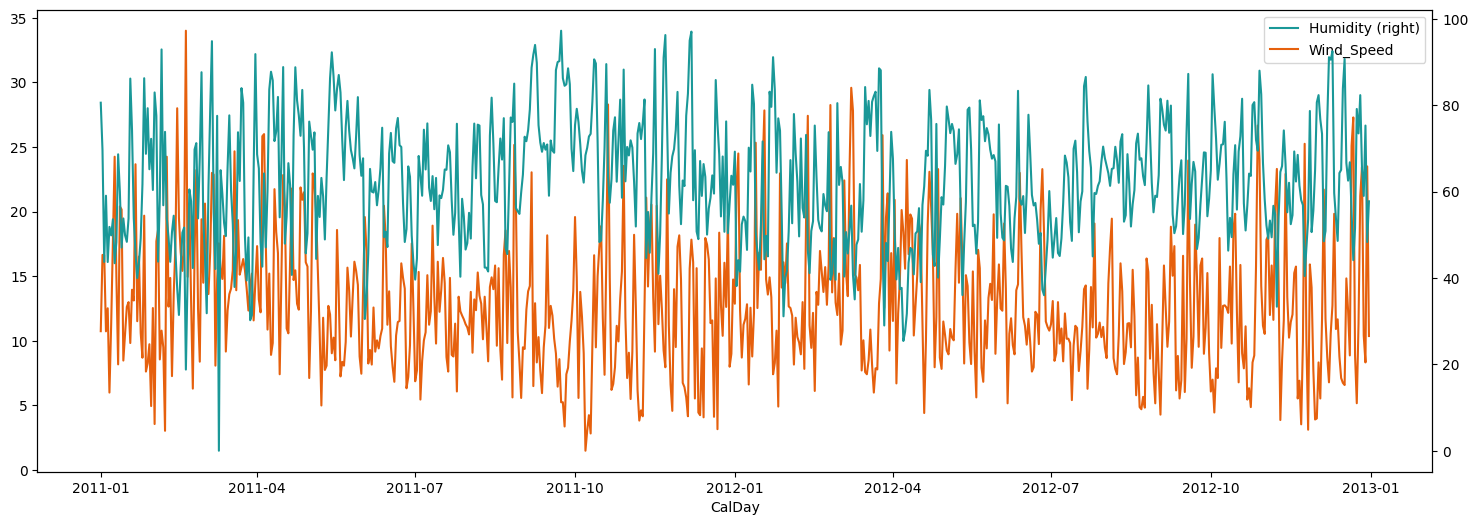

In [48]:
(bikes_hdf
 .select('CalDay', 'Humidity', 'Wind_Speed').collect()
 .plot(x='CalDay', secondary_y=['Humidity'], color=('C2','C3'))
)
plt.show()

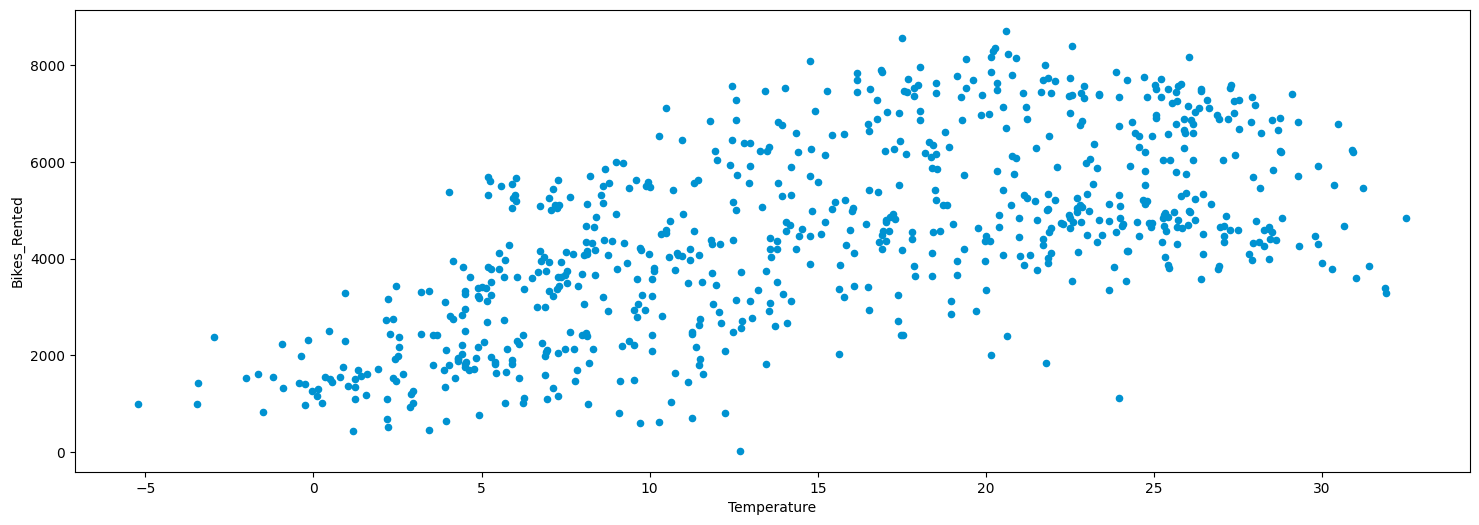

In [49]:
(bikes_hdf
 .select('Bikes_Rented', 'Humidity', 'Temperature').collect()
 .plot.scatter(y='Bikes_Rented', x='Temperature')
)
plt.show()

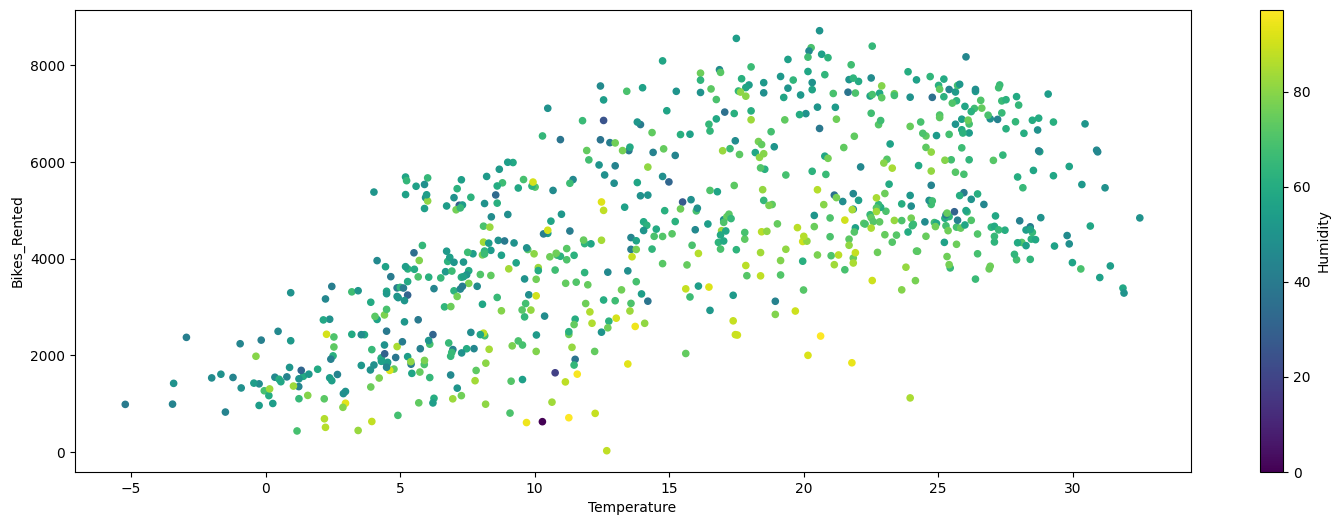

In [51]:
(bikes_hdf
 .select('Bikes_Rented', 'Temperature', 'Humidity').collect()
 .plot.scatter(y='Bikes_Rented', x='Temperature', c='Humidity')
)
plt.show()

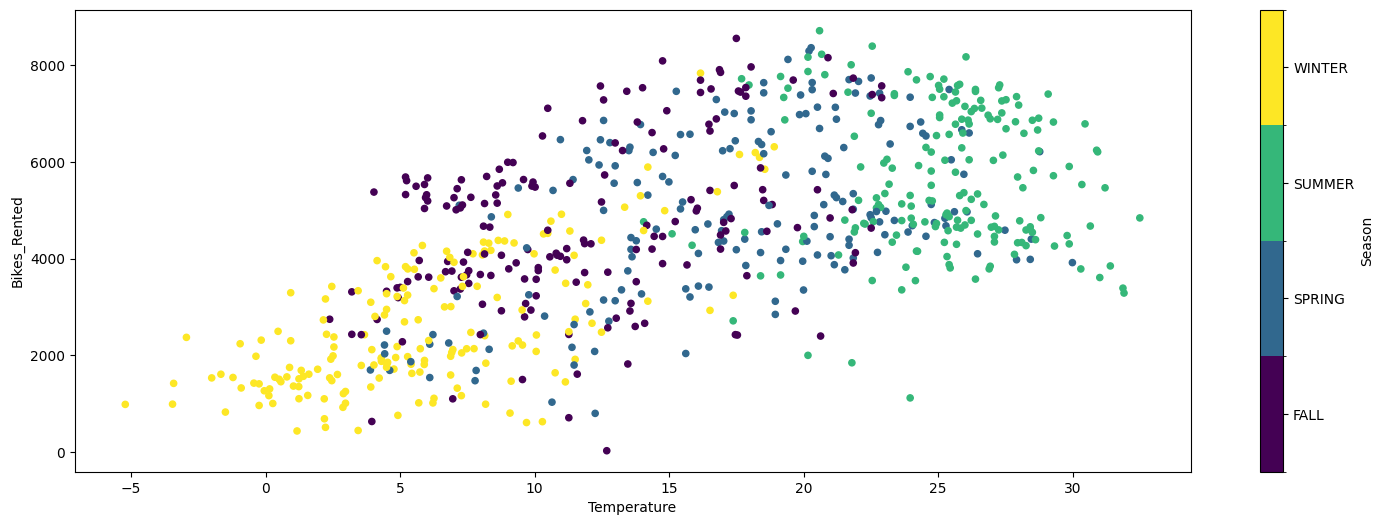

In [57]:
(bikes_hdf
 .select('Bikes_Rented', 'Temperature', 'Season').collect().astype({"Season": 'category'})
 .plot.scatter(y='Bikes_Rented', x='Temperature', c='Season', 
               colormap='viridis' #try to comment this like to see the difference
              )
)
plt.show()

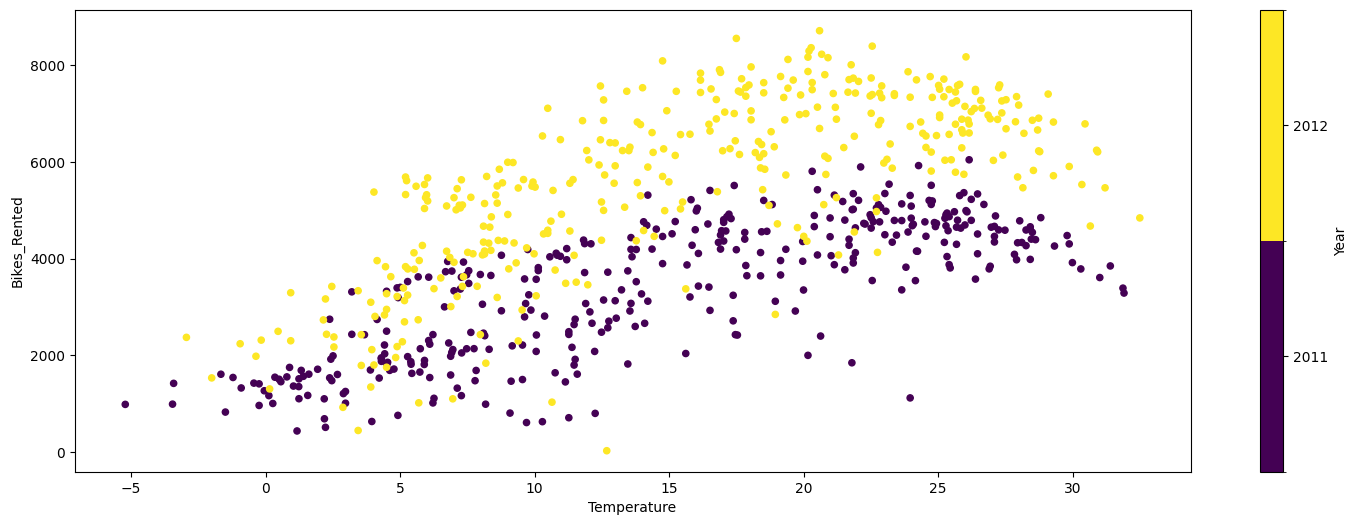

In [59]:
(bikes_hdf
 .select('Bikes_Rented', 'Temperature', 'Year').collect().astype({"Year": 'category'})
 .plot.scatter(y='Bikes_Rented', x='Temperature', c='Year', colormap='viridis')
)
plt.show()

In [60]:
weather_df=bikes_hdf.value_counts(['Weather']).collect().set_index('VALUES')
display(weather_df)

,NUM_Weather
VALUES,
MISTY,247
GOOD,463
RAIN/SNOW/STORM,21


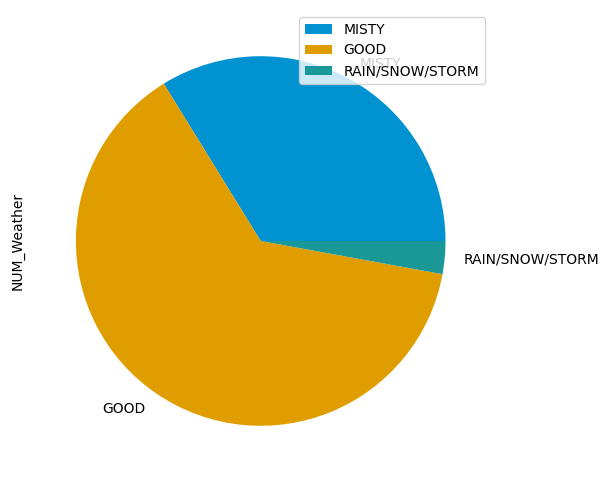

In [61]:
(weather_df
 .plot.pie(y = 'NUM_Weather')
)
plt.show()

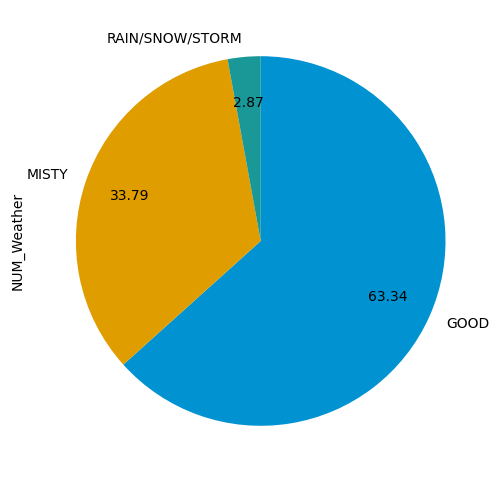

In [62]:
(weather_df
 .sort_values('NUM_Weather', ascending=False)
 .plot.pie(y = 'NUM_Weather', legend=False, 
        startangle=90, counterclock=False,
        autopct='%.2f', pctdistance=0.75)
)
plt.show()

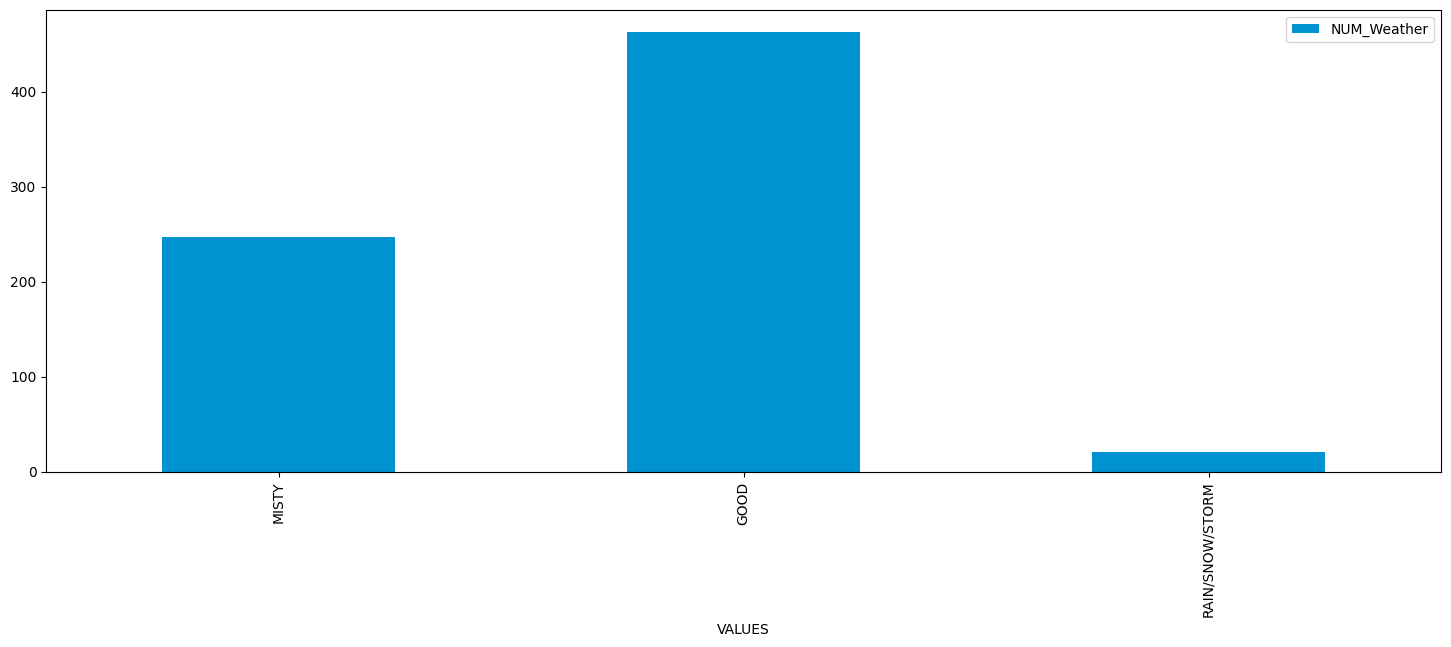

In [63]:
weather_df.plot.bar()
plt.show()

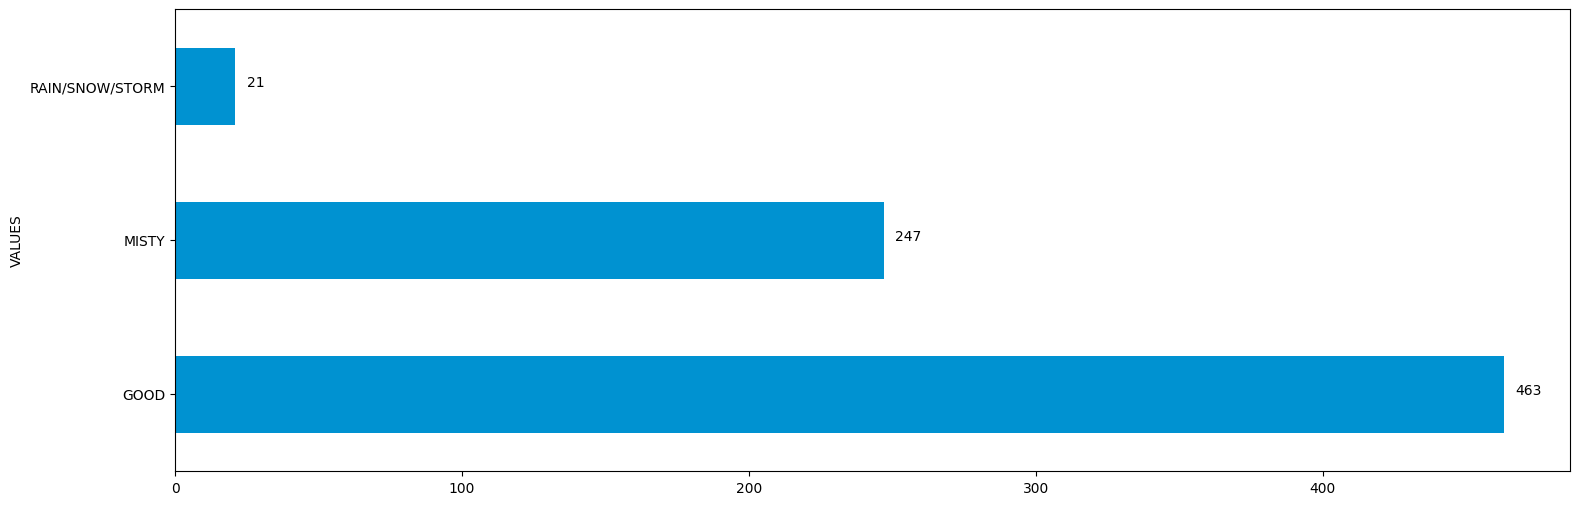

In [64]:
(weather_df
 .sort_values('NUM_Weather', ascending=False)
 .plot.barh(legend=False)
)

#Using text annotations to calculate positions and place values next to their corresponding bars
for i in range(len(weather_df)):
    plt.text(y = i, 
             x = weather_df.sort_values('NUM_Weather', ascending=False).NUM_Weather[i]+4, # x position
             s = weather_df.sort_values('NUM_Weather', ascending=False).NUM_Weather[i],   # text to display
             ha = 'left')
plt.show()

In [65]:
from hana_ml.visualizers.eda import EDAVisualizer

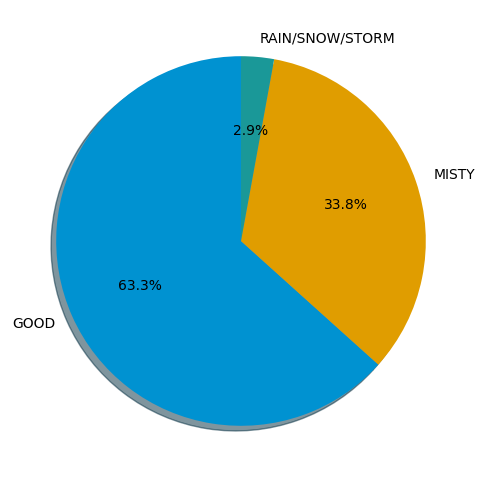

In [71]:
_, df = EDAVisualizer().pie_plot(data=bikes_hdf, column='Weather',
                                 legend=False, explode=0, 
                                 startangle=90, counterclock='False')
plt.show()

In [72]:
display(df)

,Weather,COUNT
0,GOOD,463
1,MISTY,247
2,RAIN/SNOW/STORM,21


TypeError: EDAVisualizer.bar_plot() missing 1 required positional argument: 'data'

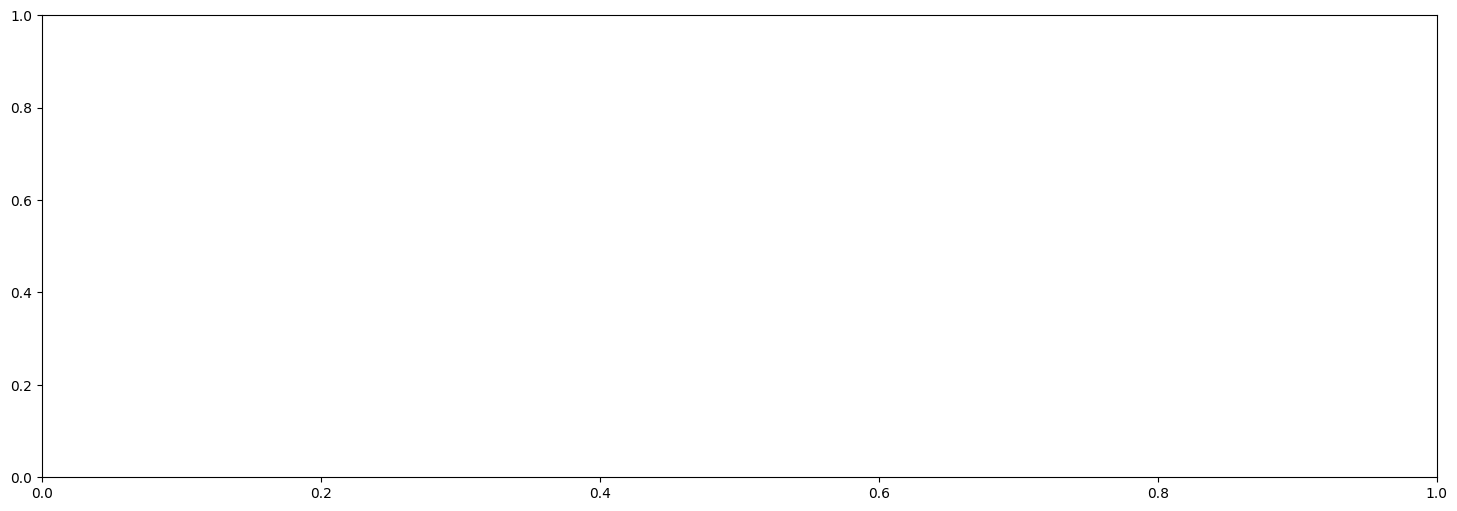

In [75]:
_, df = EDAVisualizer().bar_plot(data_hdf=bikes_hdf, column='Weather', aggregation={'Weather':'count'})
plt.show()